In [2]:
#import statements
import csv, random
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy import *

In [5]:
#termination criteria is when fitness < 0.01
COUNT = [10]
        
class Tree:
    def __init__(self):
        self.root = Node()
        self.root.value = self.randomOp()
        self.array = []
        self.operators = ['+', '-', '*', '/']
        self.operands = ['x', 'x', '-3', '-2', '-1', '1', '2', '3']
        self.fitness = 0
        self.weights = self.makeWeights()
        self._initialTree(self.root)
        
    def makeWeights(self):
        #make array of weights for each tree in population
        weightArr = []
        for i in range(100):
            if i <= 20:
                weightArr.append(20)
            elif i > 20 & i<=40:
                weightArr.append(10)
            elif i > 40 & i<=60:
                weightArr.append(5)
            elif i > 60 & i<=80:
                weightArr.append(2)
            elif i > 80 & i<=100:
                weightArr.append(1)
        return weightArr
        
    def randomOp(self):
        #picks a random value to assign to a node
        options = ['+', '-', '*', '/', 'x', '-2', '-1', '1', '2']
        length = len(options)
        value = random.randint(0,length-1)
        return options[value]

    def _initialTree(self, node):
        #initalize node values in tree
        operators = ['+', '-', '*', '/']
        operands = ['x', '-2', '-1', '1', '2']
        
        if (node.value in operators):
            leftNode = Node()
            leftNode.value = self.randomOp()
            node.left = leftNode
            leftNode.parent = node
            
            rightNode = Node()
            rightNode.value = self.randomOp()
            node.right = rightNode
            rightNode.parent = node
            
            self._initialTree(leftNode)
            self._initialTree(rightNode)

    def initialPop(self):
        #calls initial tree to create initial population
        forrest = []
        for i in range(10):
            newTree = Tree()
            forrest.append(newTree)

    def printIO(self, node):
        #prints in order traversal of the tree into string
        sVal = ""
        if node:
            sVal = '(' + self.printIO(node.left)

            sVal = sVal + str(node.value)

            sVal = sVal + self.printIO(node.right) + ')'
        return sVal
    
    def treeToArray(self, root):
        #adds elements of tree to array
        if root is None:
            return
        if root:
            self.treeToArray(root.left)

            self.array.append(root)

            self.treeToArray(root.right)
    
    def randomNode(self):
        #picks random node from the tree
        length = len(self.array)
        if length == 1:
            return self.array[0]
        value = random.randint(0,length-1)
        return self.array[value]

    
    def crossover(self, tree2):
        #takes two trees and swaps parent tree 1 with parent tree 2
        
        #makes copy of tree to crossover
        dup1 = deepcopy(self)
        dup1.treeToArray(dup1.root)
        dup2 = deepcopy(tree2)
        dup2.treeToArray(dup2.root)

        #find random node from tree
        random1 = dup1.randomNode()
        random2 = dup2.randomNode()

        #check parents of random nodes and change pointers to right or left
        if random1.parent == None:
            dup1.root = random2
        elif random1.parent.left == random1:
            random1.parent.left = random2
        else:
            random1.parent.right = random2
        
        if random2.parent == None:
            dup2.root = random1
        elif random2.parent.left == random2:
            random2.parent.left = random1
        else:
            random2.parent.right = random1

        tempParent = random1.parent
        random1.parent = random2.parent
        random2.parent = tempParent

        return dup1, dup2
    
    def mutate(self):
        operators = ['+', '-', '*', '/']
        operands = ['x', '-2', '-1', '1', '2']
        
        duplicate = deepcopy(self)
        duplicate.treeToArray(duplicate.root)
        
        random1 = duplicate.randomNode()
        
        if random1.value in operators:
            length = len(operators)
            value = random.randint(0,length-1)
            random1.value = operators[value]
        else:
            length = len(operands)
            value = random.randint(0,length-1)
            random1.value = operands[value]
        
        self._initialTree(random1)
        
        return duplicate
        
    
    def print2DUtil(self, root, space):
        # print tree output 
        
        # Base case
        if (root == None):
            return
        # Increase distance between levels
        space += COUNT[0]
    
        # Process right child first
        self.print2DUtil(root.right, space)
    
        # Print current node after space
        print()
        for i in range(COUNT[0], space):
            print(end=" ")
        print(root.value)
    
        # Process left child
        self.print2DUtil(root.left, space)

    def print2D(self, root):
        # space=[0]
        # Pass initial space count as 0
        self.print2DUtil(root, 0) 
    
    def simplify(self, x, node):
        # evaluates tree with given x value
        if node:
            #check for x value
            if node.value == "x":
                return x
            # check for operand
            if node.value not in self.operators:
                return float(node.value)
            
            # First recur on left child
            valLeft = self.simplify(x, node.left)
            # the recur on right child
            valRight = self.simplify(x, node.right)
            
            # applying operators
            if node.value == "+":
                return valLeft + valRight
            if node.value == "-":
                return valLeft - valRight
            if node.value == "*":
                return valLeft * valRight
            if node.value == "/":
                if float(valRight) == 0:
                    return 1
                else:
                    return float(valLeft) / float(valRight)
    
    def getFitness(self, data):
        total = 0
        PRESSURE_WEIGHT = 0.02
        #calculates fitness of each tree
        for i in range(len(data)):
            arr = data[i]
            arr[0] = float(arr[0])
            arr[1] = float(arr[1])
            
            val = self.simplify(arr[0], self.root)
            
            output = (val - arr[1])**2
            pressured = output + PRESSURE_WEIGHT*len(self.array)
            total = total + pressured
        # divide by len of training
        self.fitness = total / len(data)
        

class Node:
    #initialize
    print("initialize node")
    def __init__(self):
        self.parent = None
        self.left = None
        self.right = None
        self.value = None 
        
def experiment(data):
    print("TESTING EVAL")
    # build tree population of 30
    reserve = []
    newGen = []
    for i in range(100):
        newGen.append(Tree())
    
    #producing 50 generations
    NUM_GENS = 0
    while NUM_GENS < 200 or newGen[0].fitness < 5:
        if NUM_GENS > 20:
            if reserve[NUM_GENS - 1] == reserve[NUM_GENS - 11]:
                # if fitness values have stabilized, regenerate initial population
                newGen = []
                for i in range(100):
                    newGen.append(Tree())
                    
        #loop through each tree
        for tree in range(len(newGen)):
            newGen[tree].getFitness(data)
            #define self.fitness in tree class
        #print("FITNESS VALS COMPLETE")

        newGen.sort(key=lambda x: x.fitness)
        print("GEN NUMBER", NUM_GENS)
        print("BEST INDIV FROM NEW GEN", newGen[0].fitness)
        string = newGen[0].printIO(newGen[0].root)
        print("STRING OUTPUT: ", string) 
        reserve.append(newGen[0])
        print()
        print()

        # crossover 80
        oldGen = newGen
        newGen = []
        for crossTree in range(40):
            children = []
            childWeights = random.choices(oldGen, weights = oldGen[0].weights, k = 2)

            #value = random.randint(0, len(oldGen)-1)
            
            # generates 10 trees from a crossover of 2 trees
            for brood in range(2):
                cross1, cross2 = childWeights[0].crossover(childWeights[1])
                children.append(cross1)
                children.append(cross2)
                
            # evaluates the fitness of the 10 children generated
            for child in children:
                child.getFitness(data)
            
            children.sort(key=lambda x: x.fitness)
            
            #newGen.append(crossed)
            newGen.append(children[0])
            newGen.append(children[1])
        #print("CROSSOVER COMPLETE")
        #print("NEW GEN AFTER CROSSOVER", newGen[0:10])
        
        # mutate 15
        for mute in range(15):
            # randomize tree chosen for mutate -> fitter individuals have higher chance
            mutated = oldGen[mute].mutate()
            newGen.append(mutated)
        #print("MUTATE COMPLETE")
        #print("NEW GEN AFTER MUTATE", newGen[0:10])

        # reproduce 5
        for repro in range(5):
            # picked with probability proportionate to fitness
            newGen.append(oldGen[repro])
        #print("REPRO COMPLETE")
        
        print()
        print()
        NUM_GENS = NUM_GENS + 1
        #while loop end
    
    reserve.append(newGen[0])
    reserve.sort(key=lambda x: x.fitness)
    return reserve[0]
    

initialize node


After Simplification : 1.0*x**2 - 6.0*x + 15.0


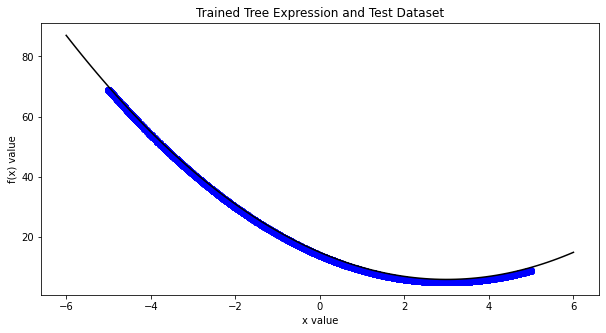

In [4]:
def main():
    with open('dataset1.csv', newline='') as csvfile:
        data = list(csv.reader(csvfile))
    data = data[1:]
    #print("Contents in csv file:", data)
    train = data[0:20000]
    #print("training:", train)
    test = data[20000:]
    miniTrain = data[0:10]
    
    #dataframe for plots
    columns = ["x", "f(x)"]
    df = pd.read_csv("dataset1.csv", usecols=columns)
    train = df[0:20000]
    test = df[20000:]
    
#     result = experiment(train)
#     # print("BEST FITNESS", result.fitness) 
#     print("IO TRAVERSAL")
#     string = result.printIO(result.root)
#     print("STRING OUTPUT: ", string) 
#     print("2D PRINT")
#     result.print2D(result.root)
    
    #result.treeToArray(result.root)
    
    # for i in range(len(result.array)):
    #     print(result.array[i].value)
    #print(result.array)
    
    #simplify expression
    x = symbols('x')
    expression = ((((((-2)-(((-1)+(2))-(x)))*(1))-(((((x)/(-2))*(1))-(2))+(x)))+(x))-((x)+(((((-2)-((2)-(x)))*(((1)-(((((1)/(-2))*(1))-(2))+(x)))/(1)))-(x))+(-2))))
    output = simplify(expression)
    print("After Simplification : {}".format(output)) 
    
    # Creating vectors X and Y
    x = np.linspace(-6, 6, 100)
    y =  1.0*x**2 - 6.0*x + 15.0
    fig = plt.figure(figsize = (10, 5))
    # Create the plot
    plt.plot(x, y, color='black')
    
    plt.scatter(test['x'], test['f(x)'], color='blue')
    
    #adding labels
    plt.title('Trained Tree Expression and Test Dataset')
    plt.xlabel('x value')
    plt.ylabel('f(x) value')

    # Show the plot
    plt.show()
    


if __name__ == "__main__":
    main()

In [ ]:
#newGen.sort(key=lambda x: x.fitness)    
#print("BEST INDIV FROM NEW GEN", newGen[0].fitness)

#newGen[0].print2D(newGen[0].root)